In [6]:
import matplotlib.pyplot as plt
import mplhep
plt.style.use(mplhep.style.ATLAS)  # ATLAS/CMS/ALICE plot style
import numpy as np
import pandas as pd
import scipy.optimize as sc

In [7]:
# import data
df = pd.read_csv('correlation.csv')

In [8]:
fit_coeff = [[1,0], [-1/3,0], [-1/3,0], [-1/3,0], [-3/29, 0],
             [-3,4], [-1/3,0], [3/7,0], [-15/13, 16/13], [-3/29, 0], [1/8, 1/24]]

In [9]:
# correction factors
Q2_sqrd = 0.9392**2 # 0.9417**2  # 
Q4_sqrd = 0.8082**2 # 0.8157**2  # 

# define fit function
def correlation_correct(theta, N, a2_theo, a4_theo):

    # transform to Legendre coefficients
    A2_theo = 10/7*(7*a2_theo + 6*a4_theo)/(5*a2_theo + 3*(5 + a4_theo))
    A4_theo = 24/7*a4_theo/(5*a2_theo + 3*(5 + a4_theo))

    # apply correction factors
    A2_exp = A2_theo * Q2_sqrd
    A4_exp = A4_theo * Q4_sqrd

    # transform back to power coefficients
    a2_exp = 6*(2*A2_exp - 5*A4_exp)/(8 - 4*A2_exp + 3*A4_exp)
    a4_exp = 35*A4_exp/(8 - 4*A2_exp + 3*A4_exp)

    # tranform theta from degree to radian
    theta = theta * np.pi / 180

    return N * (1 + a2_exp * np.cos(theta)**2 + a4_exp * np.cos(theta)**4)


coeffs, cov = sc.curve_fit(correlation_correct,
                           df['angle'], df['rate'],
                           sigma=df['error'], absolute_sigma=True)

print(coeffs)
print(np.sqrt(np.diagonal(cov)))

[ 0.29402335 -1.20180759  1.49973334]
[0.00708193 0.14570821 0.14840453]


In [10]:
print(-15/13, 16/13)

-1.1538461538461537 1.2307692307692308


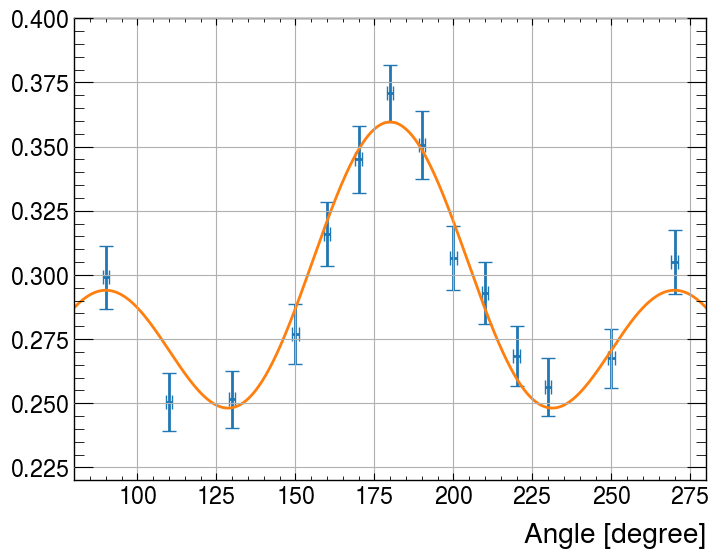

In [11]:
fig, ax = plt.subplots()

ax.errorbar(df['angle'], df['rate'],
            xerr=1, yerr=df['error'],
            fmt='none', capsize=5)

angles = np.linspace(80, 280, 1001)
ax.plot(angles, correlation_correct(angles, *coeffs), c='C1', label='fit')
ax.set_xlabel('Angle [degree]')
ax.set_xlim((80, 280))
ax.grid()

plt.show()

In [12]:
def chisq(x_data, y_data, y_err, N):
    y_model = correlation(x_data, N)
    return np.sum((y_data - y_model)**2 / y_err**2)


print(len(fit_coeff))

for i in range(11):
    def correlation_N(theta, N):
        a2 = fit_coeff[i][0]
        a4 = fit_coeff[i][0]
        theta = theta * np.pi / 180
        return N * (1 + a2 * q2**2 * np.cos(theta)**2 + a4 * q4**2 * np.cos(theta)**4)

    params, cov = sc.curve_fit(correlation_N, df['angle'], df['rate'], sigma=df['error'], absolute_sigma=True)
    print(chisq(df['angle'], y_data))

11


NameError: name 'q2' is not defined